<a href="https://colab.research.google.com/github/El-47/CS367_Lab_Midsem_Report/blob/master/Week5/Week5_bonus_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
<ipython-input-38-e39089d4e413>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hidden State Extended'] = hidden_states_extended


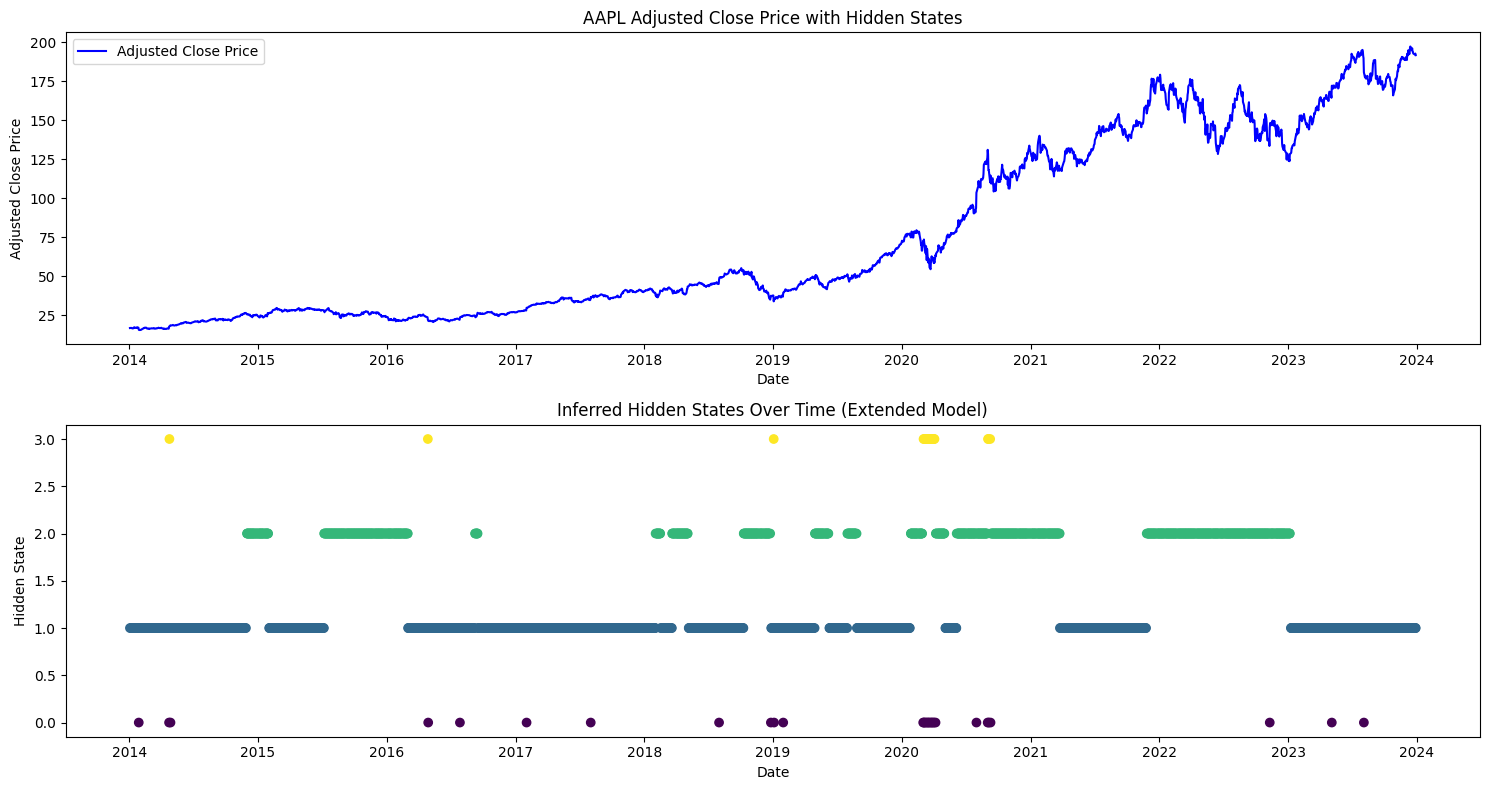

Transition matrix for extended model:
[[3.56837316e-03 3.79870574e-01 1.74651766e-01 4.41909287e-01]
 [7.17448153e-03 9.72531930e-01 1.85247505e-02 1.76883834e-03]
 [1.15806155e-02 2.91468317e-02 9.58821311e-01 4.51241897e-04]
 [7.14460858e-01 1.78868490e-07 2.80488876e-06 2.85536158e-01]]

Means and variances of each hidden state:

Hidden State 1:
Mean = 0.031221445397731844
Variance = 0.002101653637036776

Hidden State 2:
Mean = 0.001833671689012691
Variance = 0.0001240184590421993

Hidden State 3:
Mean = -0.0004221529322237987
Variance = 0.0004755092441183986

Hidden State 4:
Mean = -0.032880603041276324
Variance = 0.0017970887436029783


In [38]:
!pip install yfinance hmmlearn matplotlib pandas numpy

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

ticker = 'AAPL'
start_date = '2014-01-01'
end_date = '2024-01-01'

data = yf.download(ticker, start=start_date, end=end_date)
data['Returns'] = data['Adj Close'].pct_change()
data = data.dropna()

returns = data['Returns'].values.reshape(-1, 1)
n_hidden_states = 4

model_extended = GaussianHMM(n_components=n_hidden_states, covariance_type='full', n_iter=1000).fit(returns)
hidden_states_extended = model_extended.predict(returns)

data['Hidden State Extended'] = hidden_states_extended

plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Adj Close'], label='Adjusted Close Price', color='blue')
plt.title(f'{ticker} Adjusted Close Price with Hidden States')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(data.index, data['Hidden State Extended'], c=data['Hidden State Extended'], cmap='viridis', marker='o')
plt.title('Inferred Hidden States Over Time (Extended Model)')
plt.ylabel('Hidden State')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

print("Transition matrix for extended model:")
print(model_extended.transmat_)

print("\nMeans and variances of each hidden state:")
for i in range(n_hidden_states):
    print(f"\nHidden State {i+1}:")
    print(f"Mean = {model_extended.means_[i][0]}")
    print(f"Variance = {np.diag(model_extended.covars_[i])[0]}")
